In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import utils
import time
import MissForest
import em
import fuzzy_cmeans
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
result_iter = []
result_R2 = {'knn':[],'EM':[], 'fuzzy':[], 'MissForest':[],'IterativeImputer':[]}
result_t = {'knn':[],'EM':[], 'fuzzy':[], 'MissForest':[],'IterativeImputer':[]}

for rate in np.arange(0.1,0.7,0.1):
    print("now at", rate, "\n")
    truth_df = pd.read_csv("../Example/data/original.csv")
    X = truth_df.drop('PM2.5',axis=1)
    missing_result = utils.simulate_nan(X, nan_rate=rate)
    missing_df = missing_result['X']

    # EM
    s_time = time.time()
    result_imputed = em.impute_em(missing_df, 3000, 1e-05)
    duration = time.time() - s_time
    result_t['EM'].append(duration)
    result_iter.append(result_imputed['iteration'])

    em_imputed_df = result_imputed['X_imputed']
    X = sm.add_constant(em_imputed_df)
    y = truth_df['PM2.5'].values
    model = sm.OLS(y,X).fit()
    result_R2['EM'].append(model.rsquared_adj)
    
    print(f"Finished EM : R^2 = {result_R2['EM'][-1]}. Time = {result_t['EM'][-1]}")

    # KNN
    missing_df = missing_result['X']
    knn_imputer = KNNImputer(n_neighbors=3)
    s_time = time.time()
    knn_X = knn_imputer.fit_transform(missing_df)
    duration = time.time() - s_time
    result_t['knn'].append(duration)

    knn_X_df = pd.DataFrame(knn_X, columns=missing_df.columns)
    X = sm.add_constant(knn_X_df)
    model = sm.OLS(y,X).fit()
    result_R2['knn'].append(model.rsquared_adj)
    
    print(f"Finished KNN : R^2 = {result_R2['knn'][-1]}. Time = {result_t['knn'][-1]}")
    
    #Fuzzy
    missing_df = missing_result['X']
    fcmImputer = fuzzy_cmeans.FCMImputer(data = missing_df, num_clusters = 3)
    s_time = time.time()
    fuzzy_X = fcmImputer.impute()
    duration = time.time() - s_time
    result_t['fuzzy'].append(duration)
    
    fuzzy_X_df = pd.DataFrame(fuzzy_X, columns=missing_df.columns)
    X = sm.add_constant(fuzzy_X_df)
    model = sm.OLS(y,X).fit()
    result_R2['fuzzy'].append(model.rsquared_adj)
    
    print(f"Finished Fuzzy C-means : R^2 = {result_R2['fuzzy'][-1]}. Time = {result_t['fuzzy'][-1]}")
    
    #IterativeImputer
    missing_df = missing_result['X']
    iter_imp = IterativeImputer(random_state=0)
    s_time = time.time()
    iter_X = iter_imp.fit_transform(missing_df)
    duration = time.time() - s_time
    result_t['IterativeImputer'].append(duration)
    
    iter_X_df = pd.DataFrame(iter_X, columns=missing_df.columns)
    X = sm.add_constant(iter_X_df)
    model = sm.OLS(y,X).fit()
    result_R2['IterativeImputer'].append(model.rsquared_adj)
    
    print(f"Finished IterativeImputer : R^2 = {result_R2['IterativeImputer'][-1]}. Time = {result_t['IterativeImputer'][-1]}")
    
    # MissForest
    missing_df = missing_result['X']
    # mf_imputer = MissForest.MissForest(max_iter = 5, clf = 'RandomForestClassifier', rgr = 'RandomForestRegressor')
    mf_imputer = MissForest.MissForest(max_iter = 5)
    s_time = time.time()
    mf_X = mf_imputer.fit_transform(missing_df)
    duration = time.time() - s_time
    result_t['MissForest'].append(duration)
    
    mf_X_df = pd.DataFrame(mf_X, columns=missing_df.columns)
    X = sm.add_constant(mf_X_df)
    model = sm.OLS(y,X).fit()
    result_R2['MissForest'].append(model.rsquared_adj)
    
    print(f"Finished MissForest : R^2 = {result_R2['MissForest'][-1]}. Time = {result_t['MissForest'][-1]}")

now at 0.1 

Finished EM : R^2 = 0.7390983103594879. Time = 6.251082897186279
Finished KNN : R^2 = 0.7197461948512116. Time = 3.852048873901367
 There are 5782 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.7101103518177088. Time = 15.589671850204468
Finished IterativeImputer : R^2 = 0.738612407765495. Time = 0.2569091320037842
Finished MissForest : R^2 = 0.7475161837543652. Time = 6.50702691078186
now at 0.2 

Finished EM : R^2 = 0.7087431280071046. Time = 13.956046104431152
Finished KNN : R^2 = 0.6622592888272434. Time = 6.120586156845093
 There are 7858 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.6668959998837984. Time = 8.60469913482666


/Users/kogby/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finished IterativeImputer : R^2 = 0.7074453067871667. Time = 0.32540225982666016
Finished MissForest : R^2 = 0.7168205686377191. Time = 7.509527921676636
now at 0.30000000000000004 

Finished EM : R^2 = 0.6564564111724045. Time = 36.14406490325928
Finished KNN : R^2 = 0.5948479202687029. Time = 9.510567903518677
 There are 8529 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.5944037984273456. Time = 4.855591058731079


/Users/kogby/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finished IterativeImputer : R^2 = 0.6350701019157944. Time = 0.30532002449035645
Finished MissForest : R^2 = 0.6650706623948865. Time = 8.596739053726196
now at 0.4 

Finished EM : R^2 = 0.6103524393687041. Time = 76.07298684120178
Finished KNN : R^2 = 0.5127364049465686. Time = 12.375958919525146
 There are 8736 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.538296914242622. Time = 4.248612880706787


/Users/kogby/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finished IterativeImputer : R^2 = 0.5896512942766051. Time = 0.3116722106933594
Finished MissForest : R^2 = 0.6046037513377149. Time = 6.134533166885376
now at 0.5 

Finished EM : R^2 = 0.5466800351394627. Time = 287.3147928714752
Finished KNN : R^2 = 0.4092764476098141. Time = 13.839921236038208
 There are 8773 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.4655757242404691. Time = 4.550209045410156


/Users/kogby/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finished IterativeImputer : R^2 = 0.509523059952685. Time = 0.3029160499572754
Finished MissForest : R^2 = 0.5263001286670479. Time = 9.578239917755127
now at 0.6 

Finished EM : R^2 = 0.49889317719644977. Time = 600.3092358112335
Finished KNN : R^2 = 0.3580540140995794. Time = 14.343109130859375
 There are 8774 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.4103176716793696. Time = 5.533663988113403


/Users/kogby/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finished IterativeImputer : R^2 = 0.4214579437814764. Time = 0.4955482482910156
Finished MissForest : R^2 = 0.4559020466357082. Time = 5.499064683914185
now at 0.7000000000000001 

Finished EM : R^2 = 0.43338688585730756. Time = 710.1111030578613
Finished KNN : R^2 = 0.2839026707444604. Time = 15.868210077285767
 There are 8756 imcomplete rows in data
Finished Fuzzy C-means : R^2 = 0.33690526153934885. Time = 9.758522033691406


/Users/kogby/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finished IterativeImputer : R^2 = 0.3960212813626205. Time = 0.5814647674560547
Finished MissForest : R^2 = 0.371527163096803. Time = 43.399304151535034


Text(0, 0.5, 'R^2')

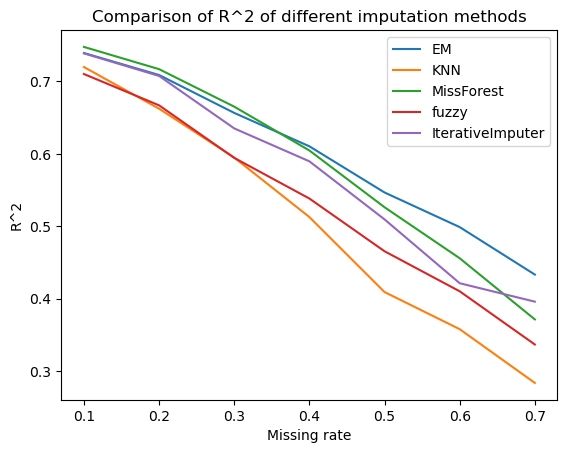

In [4]:
plt.plot(np.arange(0.1,0.8,0.1), result_R2['EM'])
plt.plot(np.arange(0.1,0.8,0.1), result_R2['knn'])
plt.plot(np.arange(0.1,0.8,0.1), result_R2['MissForest'])
plt.plot(np.arange(0.1,0.8,0.1), result_R2['fuzzy'])
plt.plot(np.arange(0.1,0.8,0.1), result_R2['IterativeImputer'])
plt.legend(('EM', 'KNN', 'MissForest','fuzzy', 'IterativeImputer'))
plt.title("Comparison of R^2 of different imputation methods")
plt.xlabel("Missing rate")
plt.ylabel("R^2")

Text(0, 0.5, 'Time consumption')

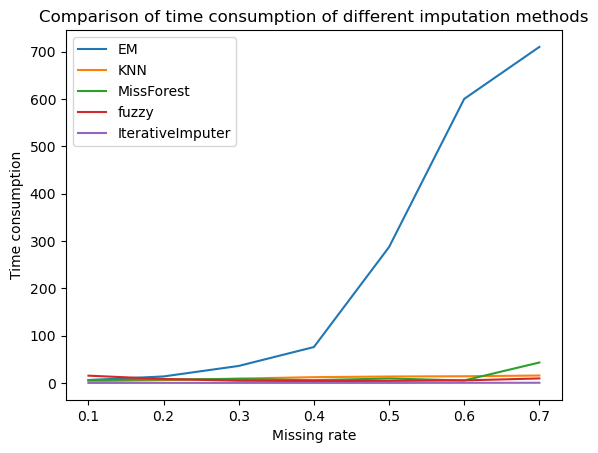

In [5]:
plt.plot(np.arange(0.1,0.8,0.1), result_t['EM'])
plt.plot(np.arange(0.1,0.8,0.1), result_t['knn'])
plt.plot(np.arange(0.1,0.8,0.1), result_t['MissForest'])
plt.plot(np.arange(0.1,0.8,0.1), result_t['fuzzy'])
plt.plot(np.arange(0.1,0.8,0.1), result_t['IterativeImputer'])
plt.legend(('EM', 'KNN', 'MissForest','fuzzy', 'IterativeImputer'))
plt.title("Comparison of time consumption of different imputation methods")
plt.xlabel("Missing rate")
plt.ylabel(("Time consumption"))

In [ ]:
# con = continuous()
# frame = con.comparison(knn_X_df, result_imputed['X_imputed'])

In [ ]:
print(result_t_em)